比较同一个测量数据的level 1, 1.5, 2.0

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
srcpath = r'D:\AERONET\data'
head = '20210614_20210614_Toulon.lev'
fnames = [head+s for s in ['10','15','20']]
flist = [os.path.join(srcpath,fname) for fname in fnames]

In [45]:
def get_aod(labels,dlines):
    # find data of AOD_xnm
    inds = []
    wls = []
    for i in range(len(labels)):
        s = labels[i]
        if 'AOD_' in s and 'nm' in s:
            #get column index
            inds.append(i)
            #get wavelength in nm
            s1 = s.split('_')[1][:-2]
            wls.append(float(s1))

    # load first data line to check the avalability of AODs
    line = dlines[0].split(',')
    inds_valid = []
    wls_valid = []
    for i in range(len(inds)):
        ind = inds[i]
        wl = wls[i]
        if float(line[ind])!=-999:
            inds_valid.append(ind)
            wls_valid.append(wl)
    #sort wls
    wls = np.array(wls_valid)
    inds = np.array(inds_valid)
    ind = np.argsort(wls)
    wls = wls[ind]
    inds = inds[ind]
    # now build arry of valid AOD
    arr = np.empty([len(dlines),len(inds)],dtype=float)
    for i in range(len(dlines)):
        line = np.array(dlines[i].split(','))
        arr[i,:] = line[inds].astype(float)
    return wls,arr

In [46]:
def get_times(labels,dlines):
    # find index of a specific label
    keyname = 'Time'
    ind = -1
    i = 0
    while i <len(labels) and ind<0:
        s = labels[i]
        if keyname in s:
            ind = i
        i+=1
    #get times
    times = []
    for line in dlines:
        s = line.split(',')
        times.append(s[ind])
    return np.array(times)

In [47]:
f = open(flist[0],"r")
lines = f.read().splitlines()
f.close()
labels = lines[6].split(',')
dlines = lines[7:]
times = get_times(labels,dlines)
aod_wls10,aods10 = get_aod(labels,dlines)

f = open(flist[1],"r")
lines = f.read().splitlines()
f.close()
labels = lines[6].split(',')
dlines = lines[7:]
aod_wls15,aods15 = get_aod(labels,dlines)

f = open(flist[2],"r")
lines = f.read().splitlines()
f.close()
labels = lines[6].split(',')
dlines = lines[7:]
aod_wls20,aods20 = get_aod(labels,dlines)    

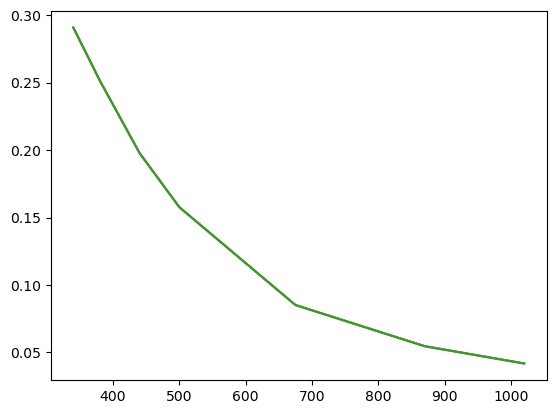

In [50]:
plt.figure()
plt.plot(aod_wls10,aods10[0,:])
plt.plot(aod_wls10,aods15[0,:])
plt.plot(aod_wls10,aods20[0,:])

## calculat the $\tau_{aer}555$ using llsq regression

time= 11:06:54
angstrom 1.45530726182553
rmse= 0.01081681682599892
tau_aer555= 0.14084278194642574
llsq regression 1.5357110112722507 2350.7659955873723
rmse= 0.008349509467466862
tau_aer555= 0.14347242786414566


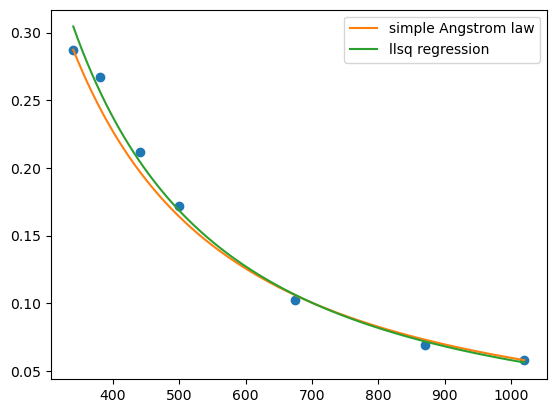

In [81]:
# unse angstrom law
i = 30
print('time=',times[i])
x = aod_wls20
y = aods20[i,:]
x1 = x[0]
x2 = x[-1]
y1 = y[0]
y2 = y[-1]
a = -1*(np.log(y2/y1))/(np.log(x2/x1))
print('angstrom',a)
xx = np.arange(340,1021)
y_ang = y1*((xx/x1)**(-a))

yfit = y1*(x/x1)**(-a)
rmse = np.sqrt(np.mean((yfit-y)**2))
print('rmse=',rmse)
# tau_aer555 calcul
tau_aer555 = y1*(555/x1)**(-a)
print('tau_aer555=',tau_aer555)

#use llsq regression
ylog = np.log(y)
xlog = np.log(x)
p = np.polyfit(xlog,ylog,1)
a = -p[0]
A = np.exp(p[1])
y_reg = A*xx**(-a)
print('llsq regression',a,A)
yfit = A*x**(-a)
rmse = np.sqrt(np.mean((yfit-y)**2))
print('rmse=',rmse)
# tau_aer555 calcul
tau_aer555 = A*555**(-a)
print('tau_aer555=',tau_aer555)

plt.figure()
plt.plot(x,y,'o')
plt.plot(xx,y_ang,label='simple Angstrom law')
plt.plot(xx,y_reg,label='llsq regression')
plt.legend()
plt.show()